# Math 428 - Homework for 04/19/19

## Problem 25.1

### Part (a)
$$\frac{dy}{dt}=y(t)t^2-1.1y(t)$$

$$\frac{dy}{dt}=y(t)(t^2-1.1)$$

$$\frac{dy}{dt}\cdot \frac{1}{y(t)}=t^2-1.1$$

$$\int\frac{dy}{dt}\cdot \frac{1}{y(t)}dt=\int (t^2-1.1) dt$$

$$log(y(t))=\frac{t^3}{3}-1.1t+C$$

$$y(t)=Ce^{\frac{1}{3}t^3-1.1t}$$

Using the initial condition, $y(0)=1$...

$$y(0)=1=C$$

$$y(t)=e^{\frac{1}{3}t^3-1.1t}$$

In [83]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Euler method of approximating ODEs
def euler_ode(dy_dx, initial=[0, 0], x_bounds=[0, 0], h=0.1):
    x, y = [initial[0]], [initial[1]]
    for i in range(1, int((x_bounds[1] - x_bounds[0]) / h) + 1):
        x_n, y_n = x[-1], y[-1]
        k1 = h * dy_dx(x_n, y_n)
        x.append(x_bounds[0] + i * h)
        y.append(y_n + k1)
        
    return x, y

# Midpoint refinement of Euler's method for approximating ODEs
def midpoint_ode(dy_dx, initial=[0, 0], x_bounds=[0, 0], h=0.1):
    x, y = [initial[0]], [initial[1]]
    for i in range(1, int((x_bounds[1] - x_bounds[0]) / h) + 1):
        x_n, y_n = x[-1], y[-1]
        k1 = h * dy_dx(x_n, y_n)
        k2 = h * dy_dx(x_n + h / 2, y_n + k1 / 2)
        x.append(x_bounds[0] + i * h)
        y.append(y_n + k2)
        
    return x, y

# Fourth-order Runge-Kutta iteration of Euler's method
def runge_kutta_ode(dy_dx, initial=[0, 0], x_bounds=[0, 0], h=0.1):
    x, y = [initial[0]], [initial[1]]
    for i in range(1, int((x_bounds[1] - x_bounds[0]) / h) + 1):
        x_n, y_n = x[-1], y[-1]
        k1 = h * dy_dx(x_n, y_n)
        k2 = h * dy_dx(x_n + h / 2, y_n + k1 / 2)
        k3 = h * dy_dx(x_n + h / 2, y_n + k2 / 2)
        k4 = h * dy_dx(x_n + h, y_n + k3)
        x.append(x_bounds[0] + i * h)
        y.append(y_n + k1 / 6 + k2 / 3 + k3 / 3 + k4 / 6)
        
    return x, y

### Part (b)

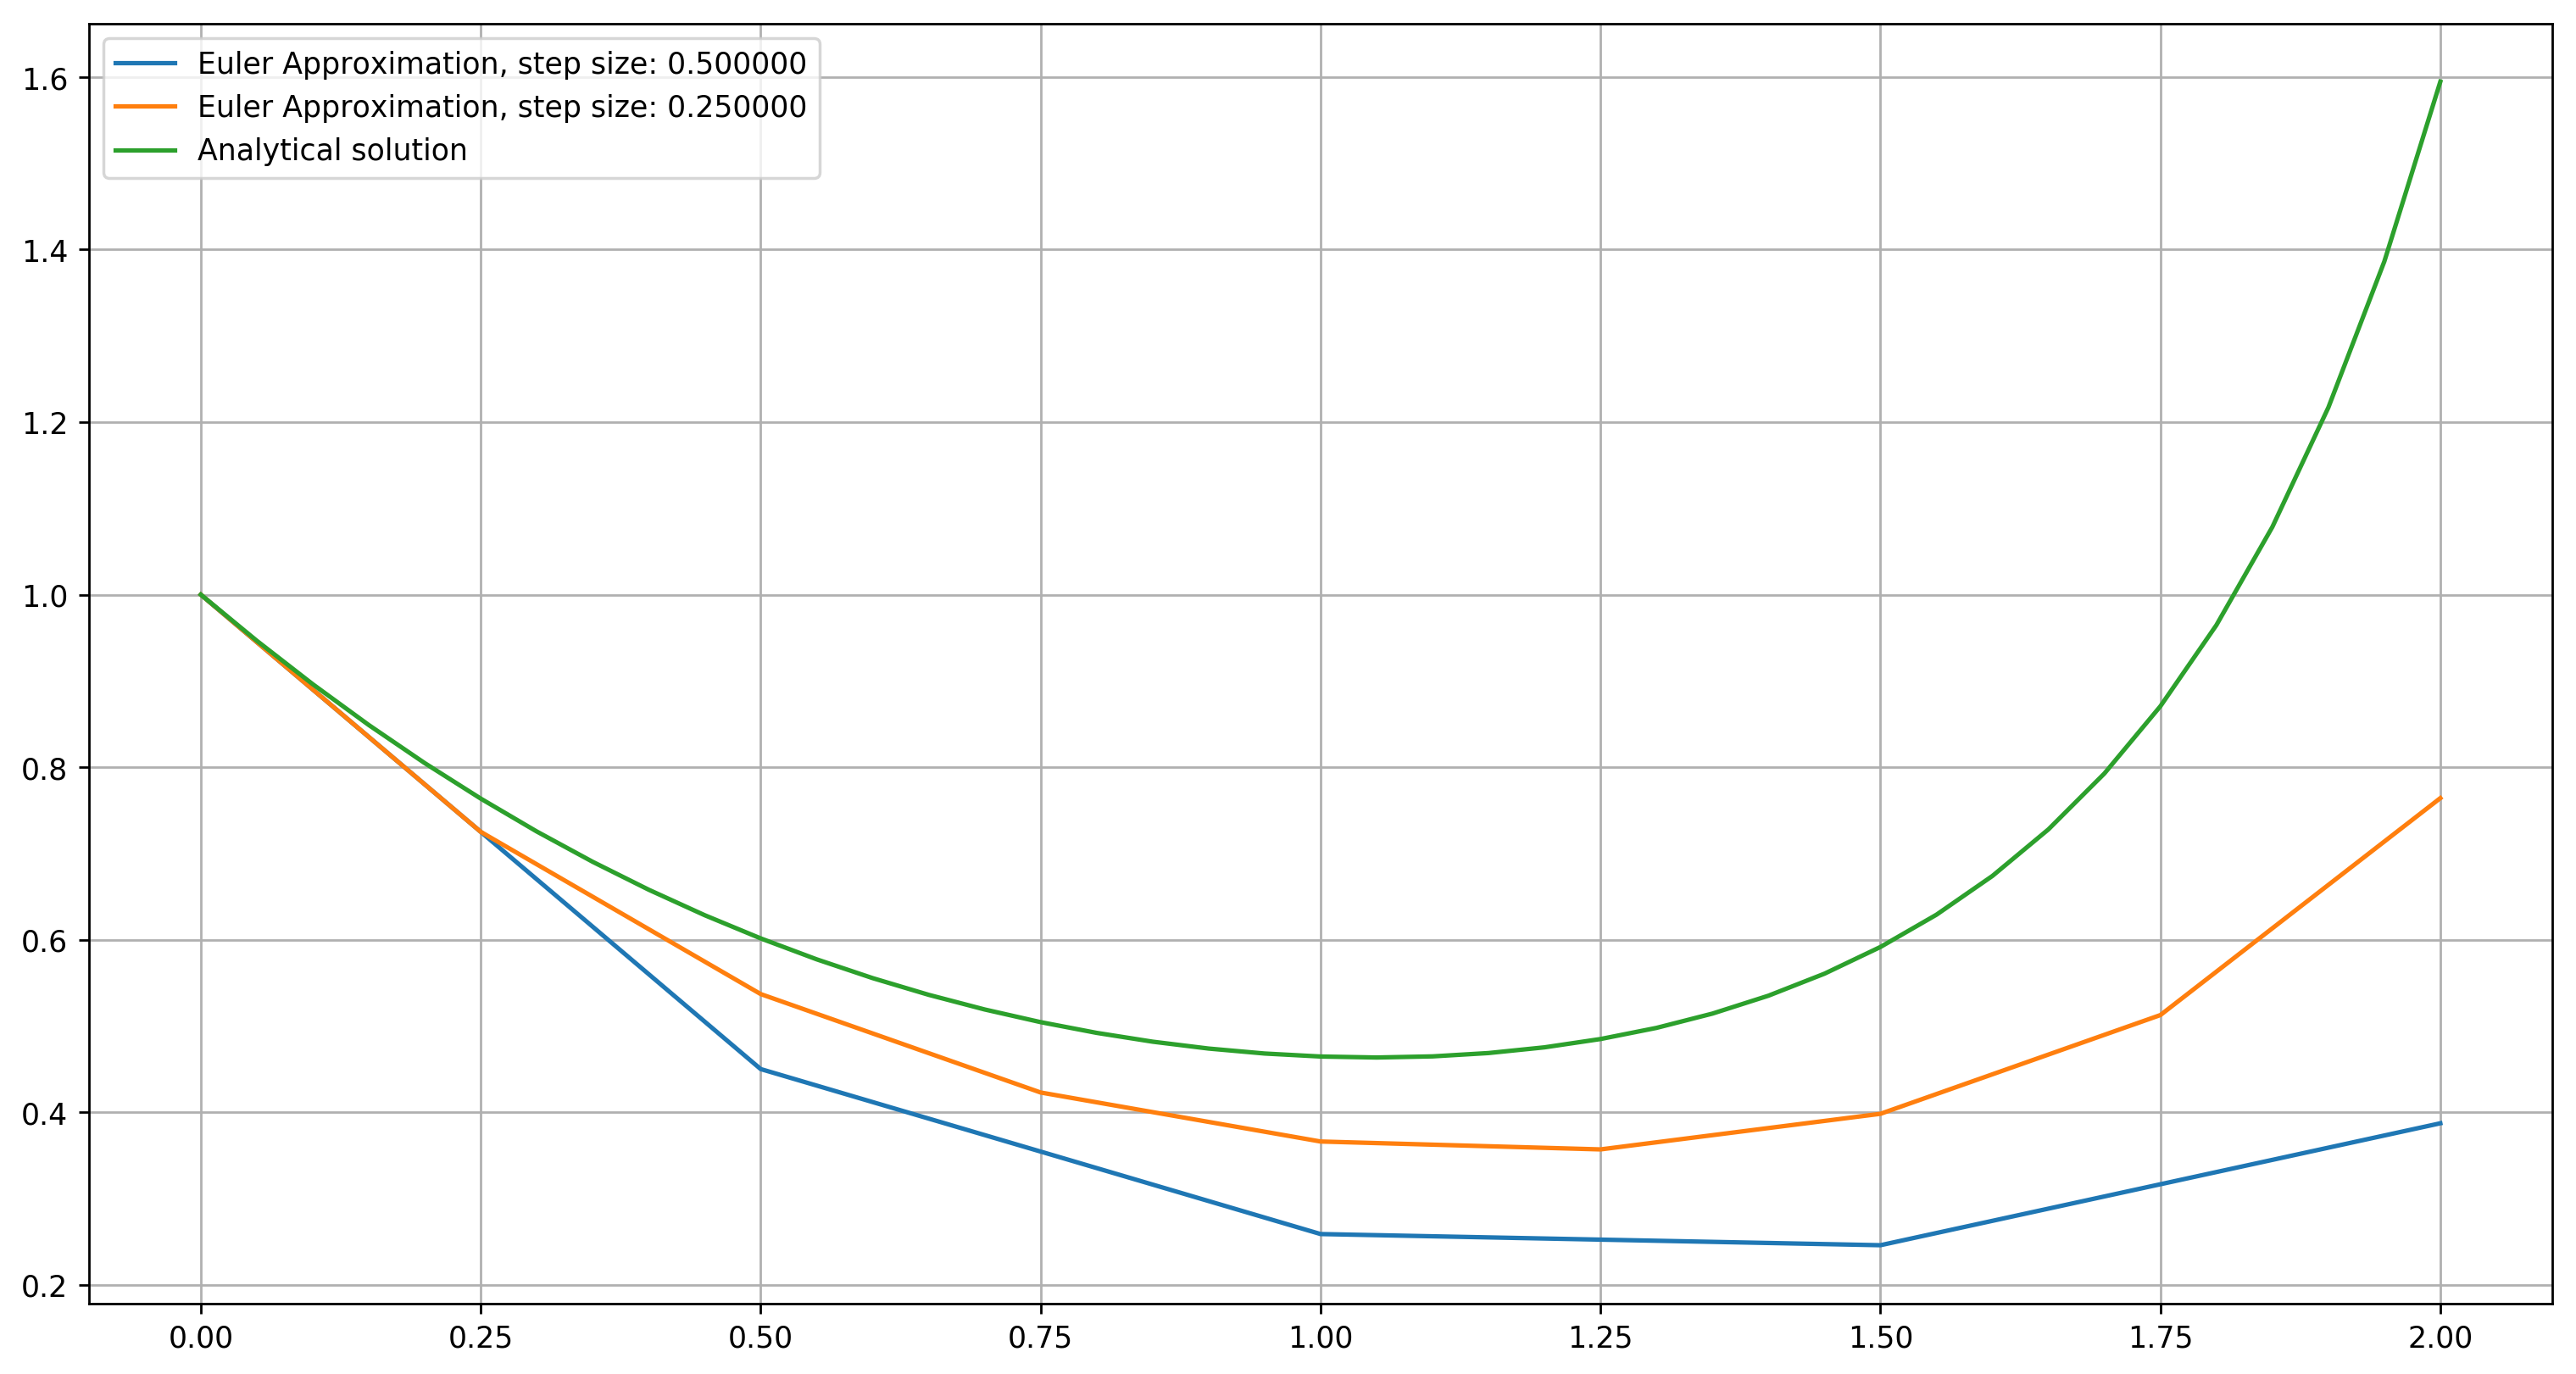

In [78]:
# The given f(t, y)
def dy_dt(t, y):
    return y * t * t - 1.1 * y

# The analytical solution to the differential equation
def y_sol(t_vals):
    return np.asarray([np.exp(t ** 3 / 3 - 1.1 * t) for t in t_vals])

# Compute the euler approximations + real function values
euler_h = 0.5
step_size = 0.05
f_t = np.arange(0, 2 + step_size, step_size)
t1, y1 = euler_ode(dy_dt, [0, 1], [0, 2], euler_h)
t2, y2 = euler_ode(dy_dt, [0, 1], [0, 2], euler_h / 2)

plt.figure(figsize=(15, 8), dpi=250)
plt.plot(t1, y1, label="Euler Approximation, step size: %f" % euler_h)
plt.plot(t2, y2, label="Euler Approximation, step size: %f" % (euler_h / 2))
plt.plot(f_t, y_sol(f_t), label="Analytical solution")
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

### Part (c)

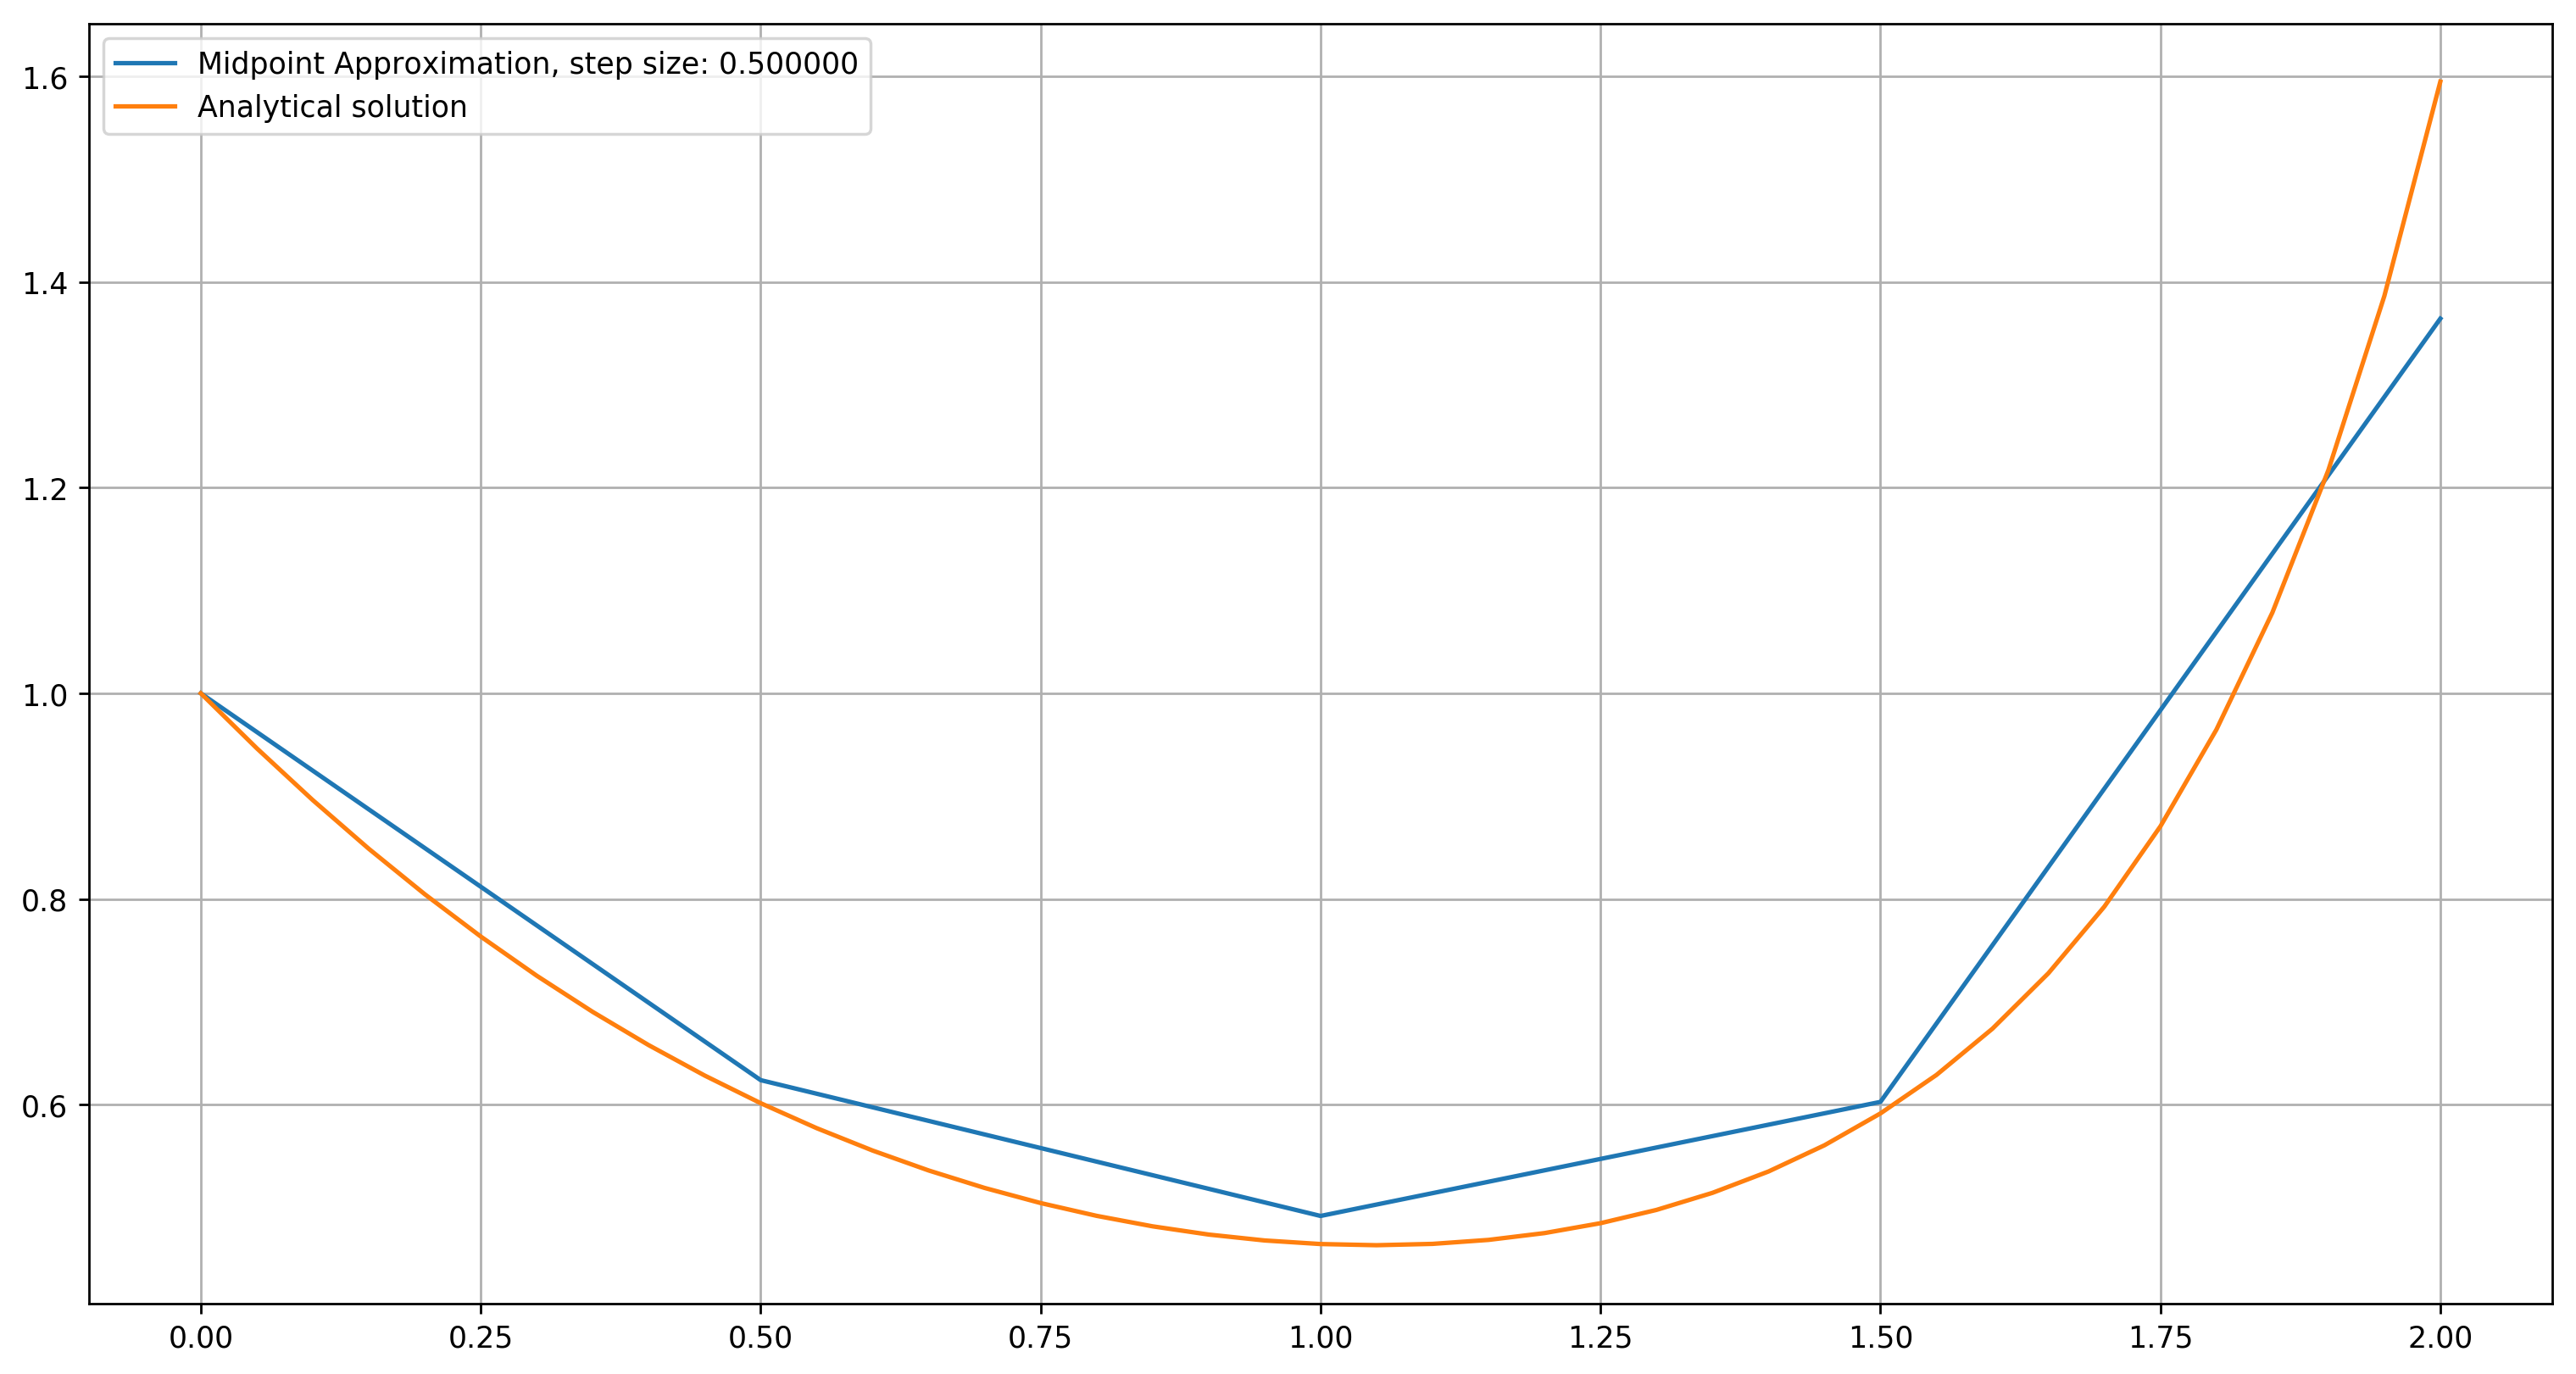

In [79]:
midpoint_h = 0.5
t_m, y_m = midpoint_ode(dy_dt, [0, 1], [0, 2], midpoint_h)

plt.figure(figsize=(15, 8), dpi=250)
plt.plot(t_m, y_m, label="Midpoint Approximation, step size: %f" % midpoint_h)
plt.plot(f_t, y_sol(f_t), label="Analytical solution")
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

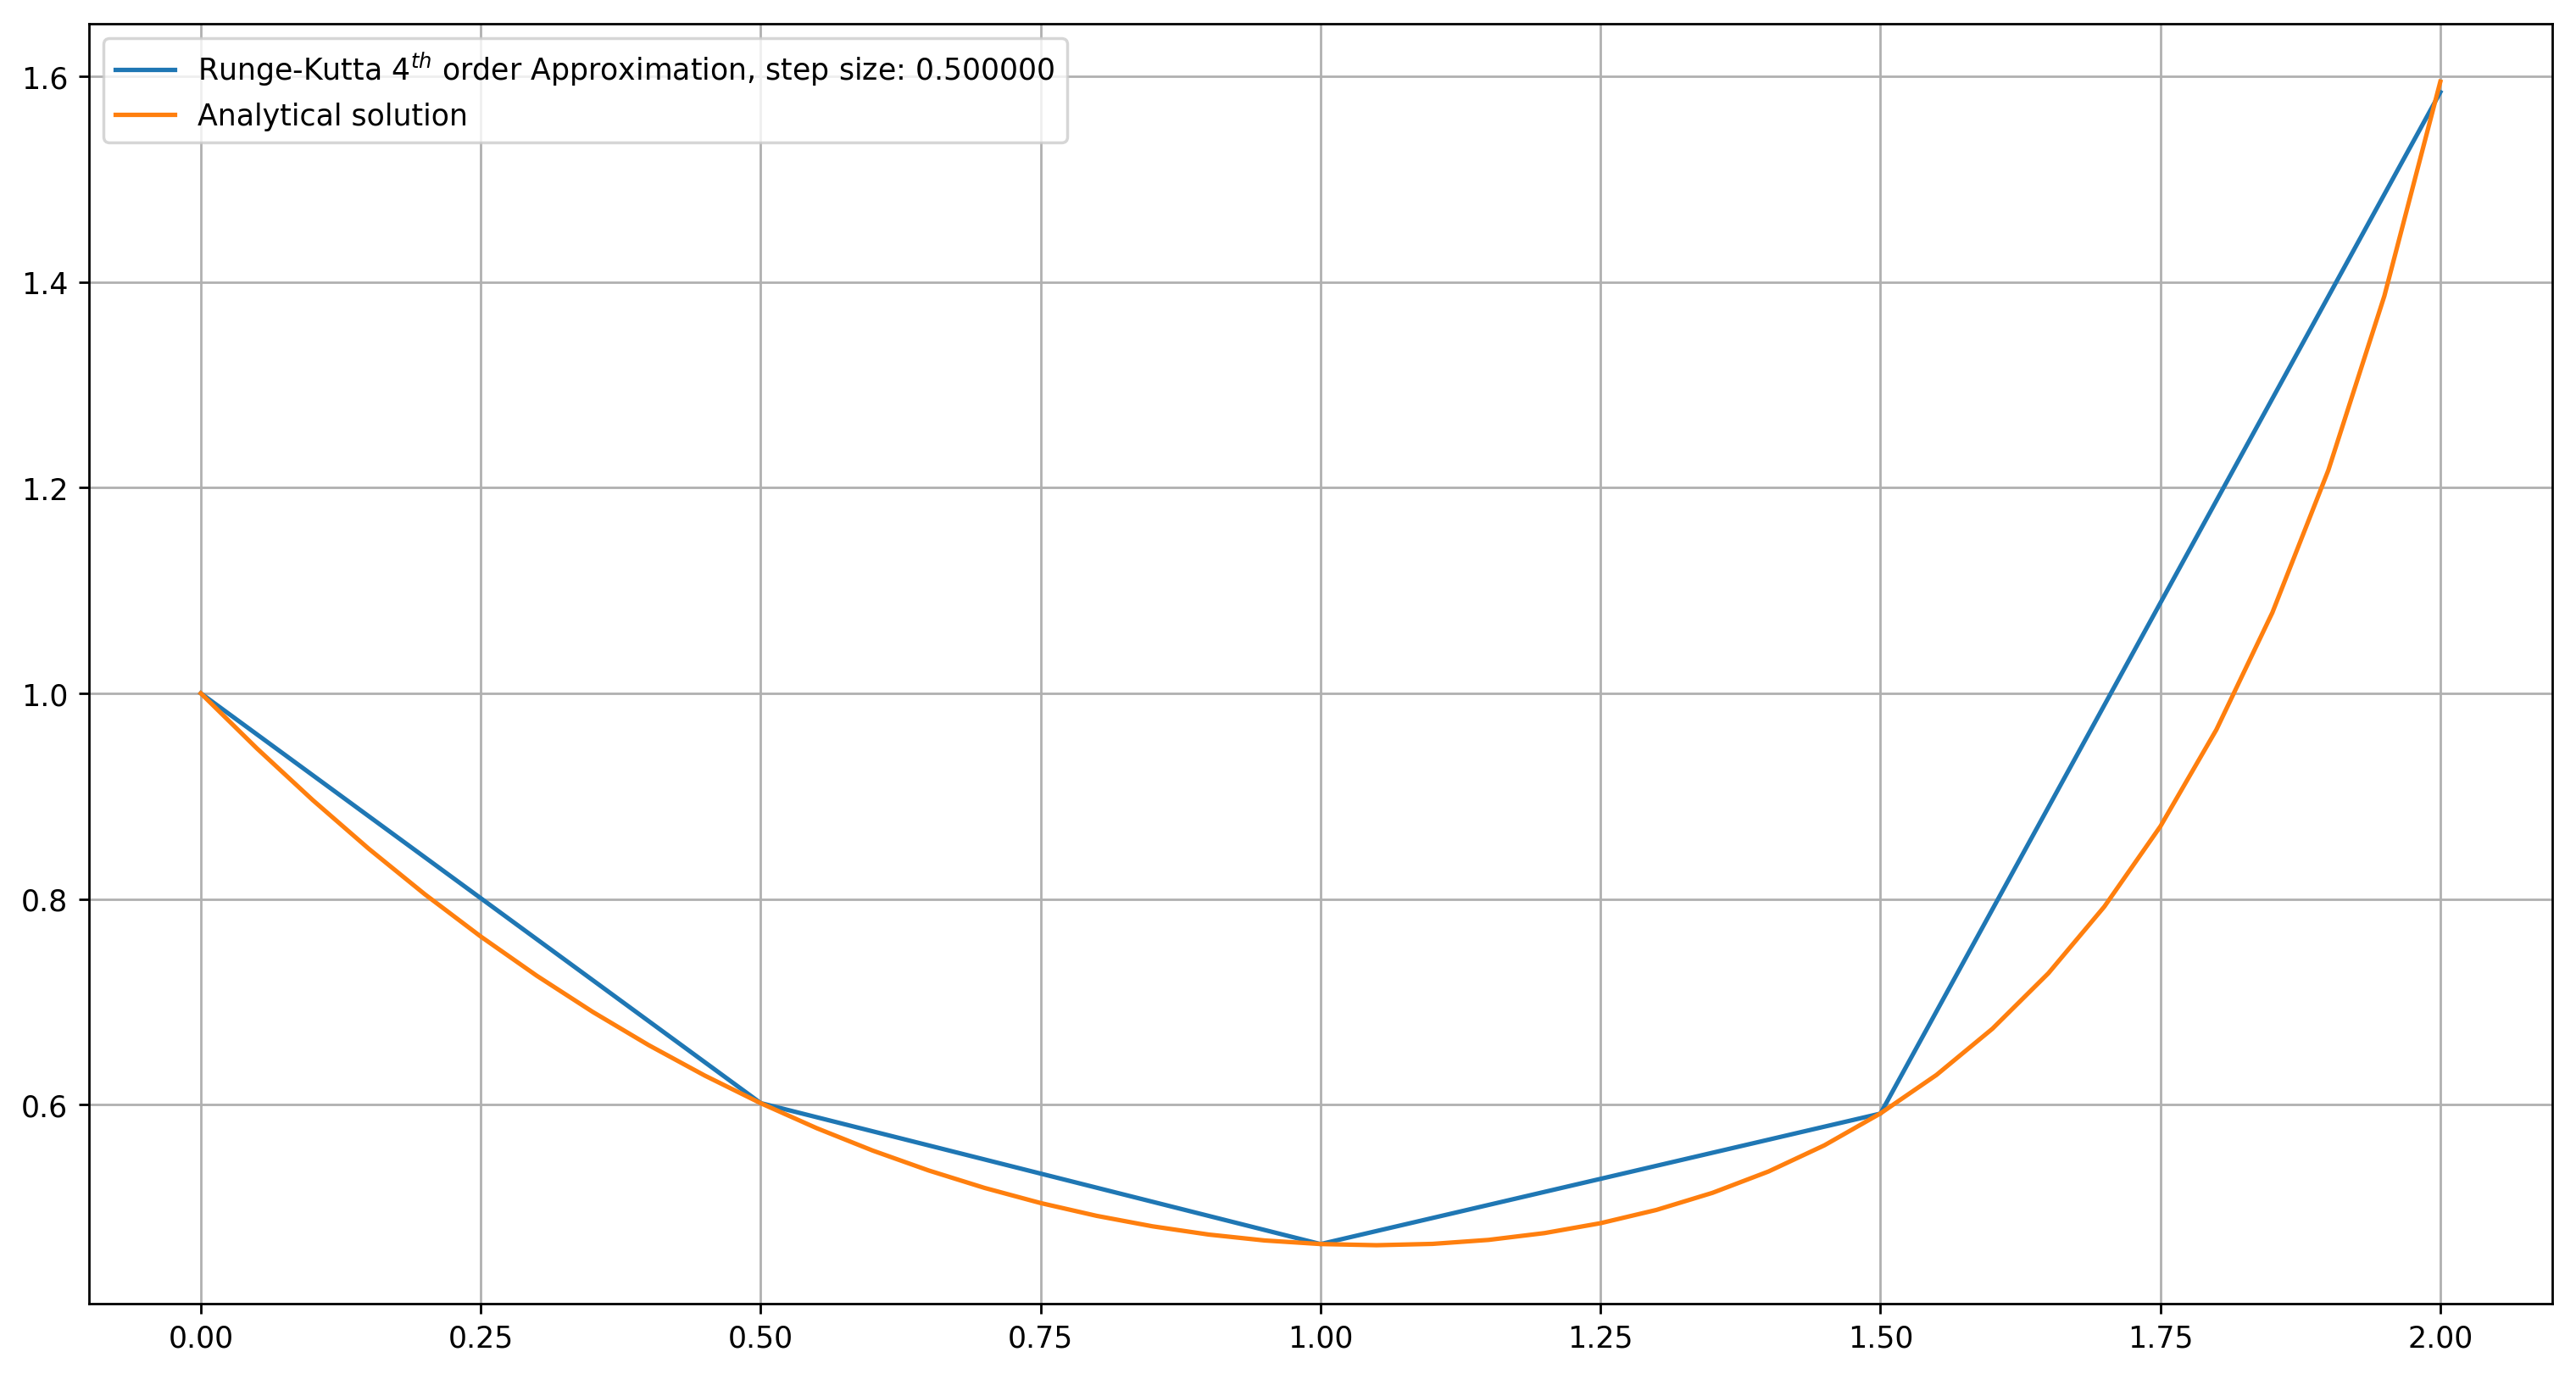

In [82]:
runge_h = 0.5
t_rk, y_rk = runge_kutta_ode(dy_dt, [0, 1], [0, 2], runge_h)

plt.figure(figsize=(15, 8), dpi=250)
plt.plot(t_rk, y_rk, label="Runge-Kutta $4^{th}$ order Approximation, step size: %f" % runge_h)
plt.plot(f_t, y_sol(f_t), label="Analytical solution")
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

## Problem 25.20
Given that $g=9.81$, $r=1.5$, $H(0)=2.75$, $A=\pi (\frac{1.5}{100})^2$, and $C=0.55$

$$Q_{out}=CA\sqrt{2gH(t)}=-\frac{dV}{dt}$$

Now to find $H(t)$. Using $R$ as the radius of the water at it's current height in time...

$$r^2 = R^2 = (r-H(t))^2$$
$$R^2=r^2-(r-H(t))^2)$$

The differential unit of volume for a differential height of water is the surface area of said water, so:

$$dV=\pi R^2 dH=\pi(r^2-(r-H(t))^2))dH$$

$$dV=(2r\pi H(t)-\pi H(t)^2)dH$$

Take the time-derivative of both of these equations, and equate it to the previous $Q_{out}$:

$$\frac{dV}{dt}=-CA\sqrt{2gH(t)}=(2r\pi H(t)-\pi H(t)^2)\frac{dH}{dt}$$

Thus an equation for $\frac{dH}{dt}$ can be obtained:

$$\frac{dH}{dt}=\frac{-CA\sqrt{2gH(t)}}{2r\pi H(t)-\pi H(t)^2}$$

Below is my implementation of this function, as well as my solution to when the tank becomes empty.

The height of the tank reached zero at 7487 seconds


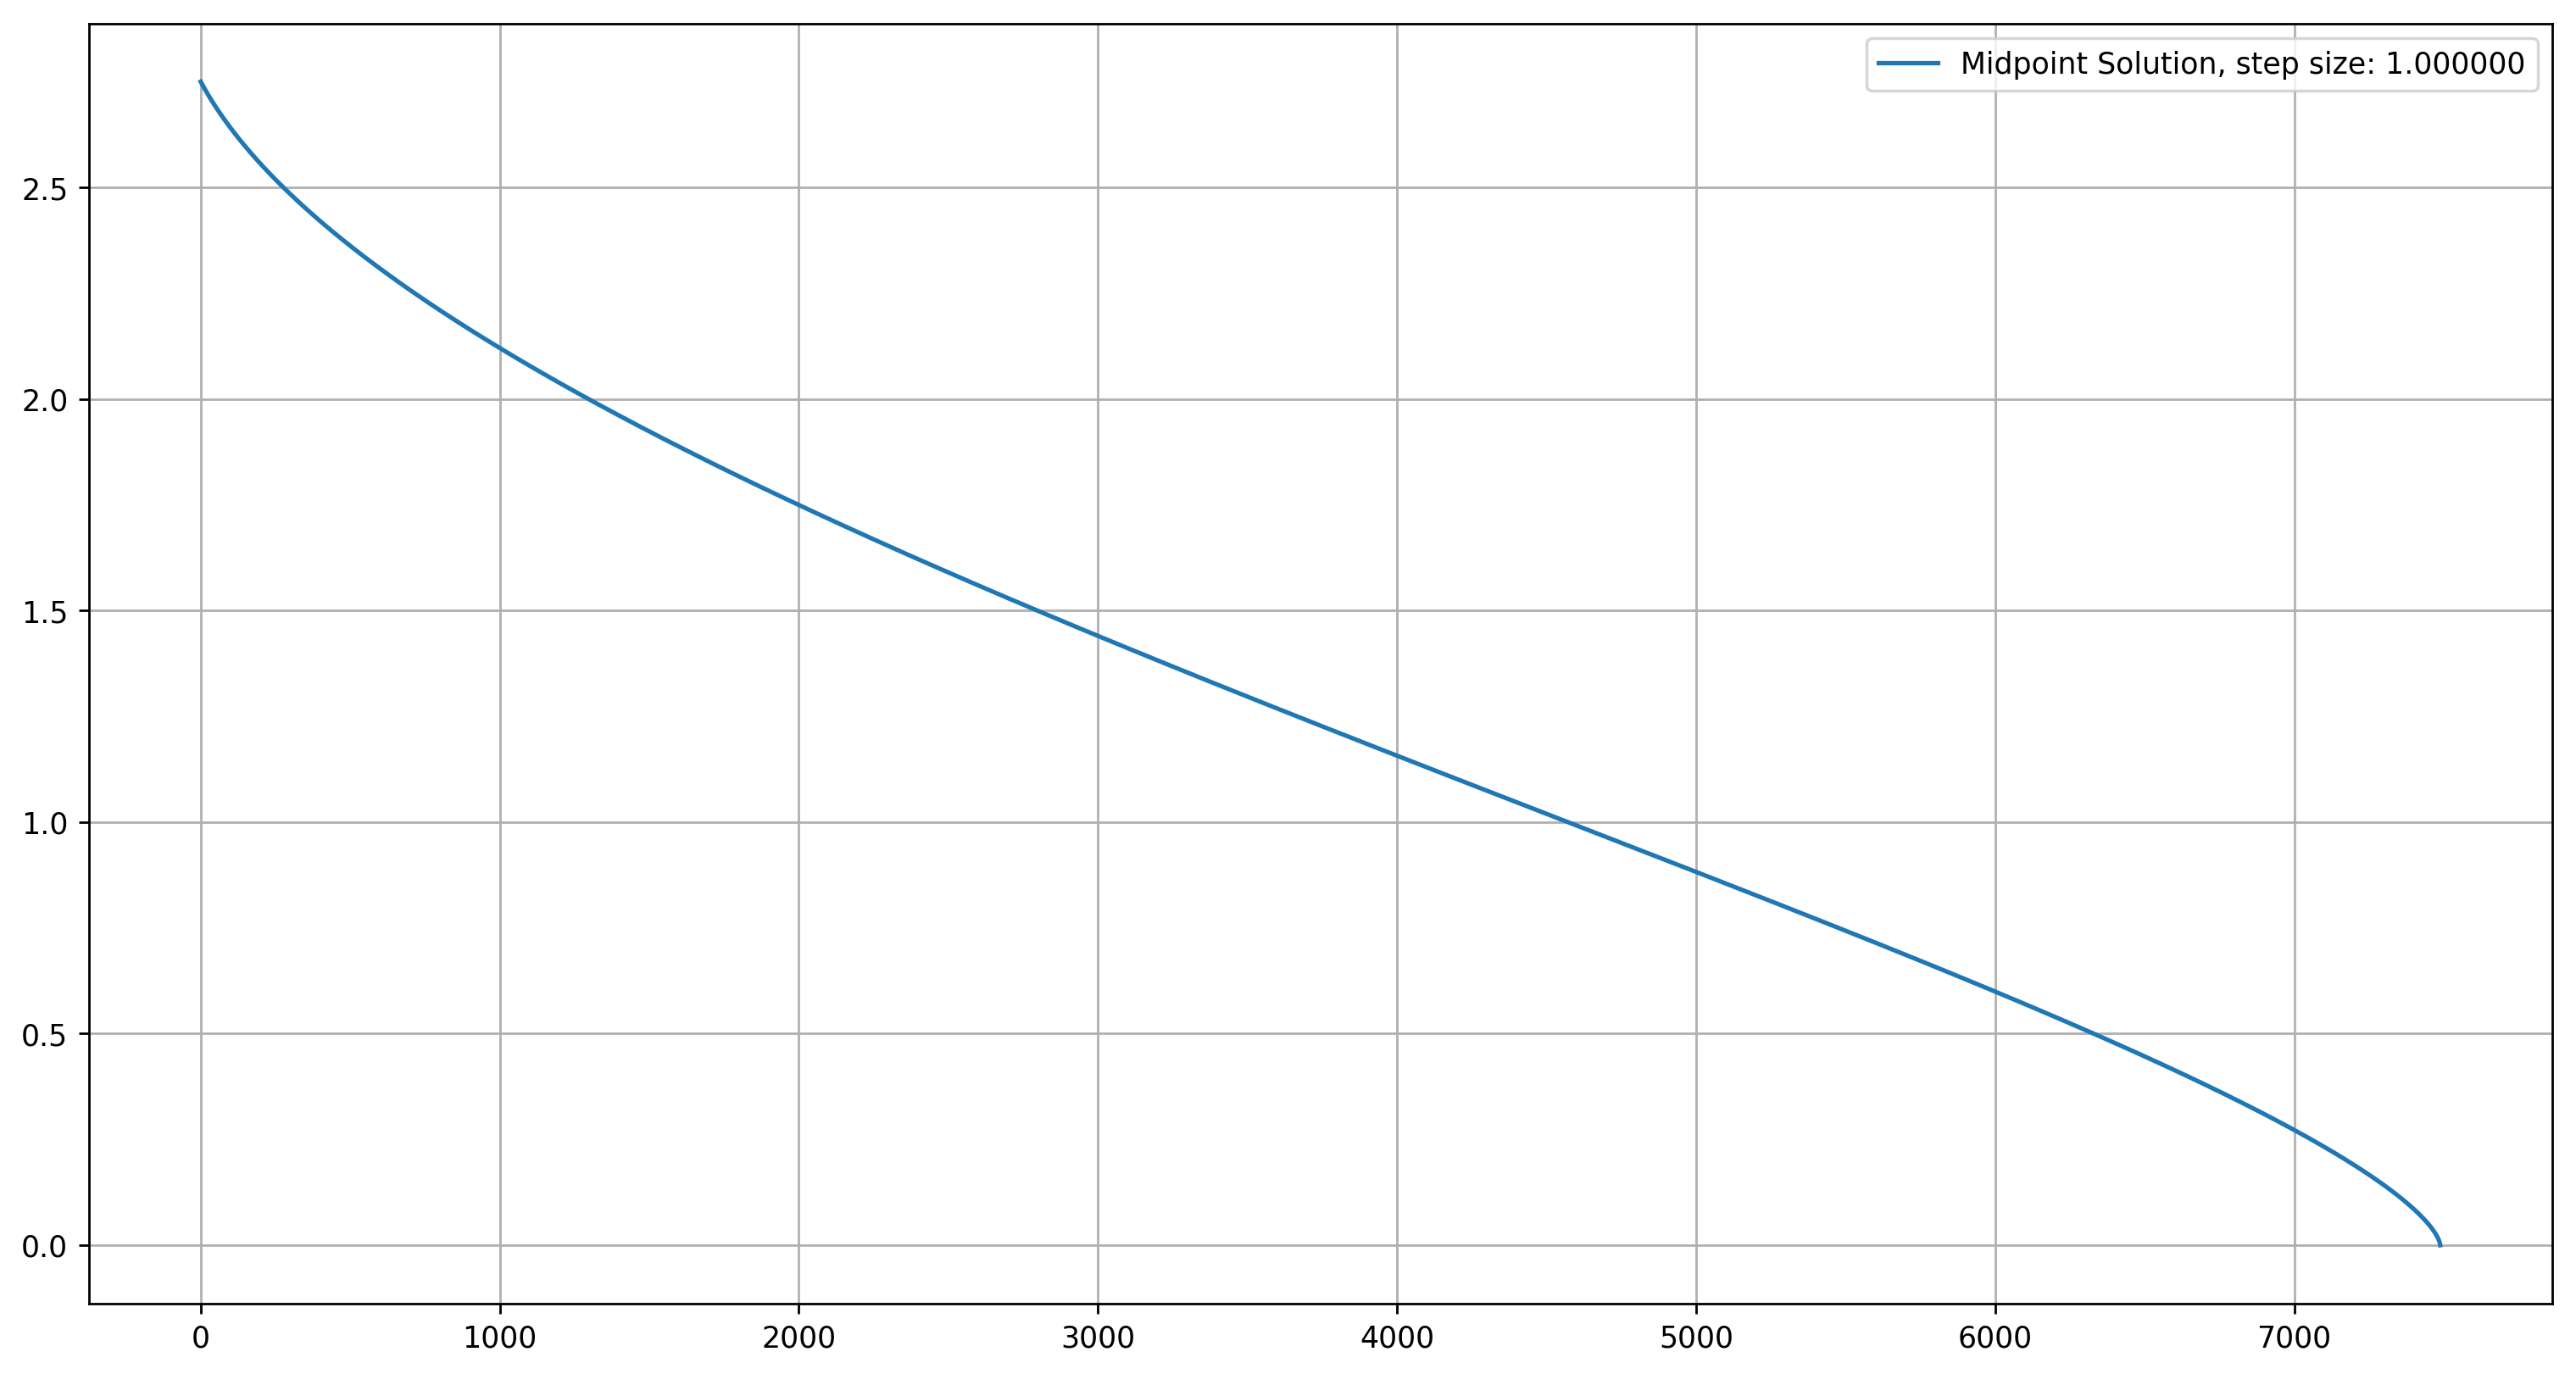

In [136]:
# Function definition of the above-derived dh/dt
def dh_dt(t, h):
    c, a, g, r = 0.55, np.pi * (1.5 / 100) ** 2, 9.81, 1.5
    return (-c * a * np.sqrt(2 * g * h))/(2 * r * np.pi * h - np.pi * h * h)

# Increment the function one (time_delta) seconds at a time
time_delta = 1
t_tank, h_tank = midpoint_ode(dh_dt, [0, 2.75], [0, 10000], time_delta)
# Calculate the time where the height became zero
t_empty = max([t for (t, h) in zip(t_tank, h_tank) if h >= 0])

print ("The height of the tank reached zero at %i seconds" % t_empty)

plt.figure(figsize=(15, 8), dpi=250)
plt.plot(t_tank, h_tank, label="Midpoint Solution, step size: %f" % time_delta)
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

My function `dh_dt()` takes time as an argument so that it works with my above-defined numerical methods, but time does not affect the output (as a variable). The reason for this is because the function is evaluated to per-second values for the height in the tank. This means that each iteration of the function correlates to one advancement of the given h (in time), so in my case one second.

Therefore, by using the Midpoint variant of the Euler method, I calculated that the tank will empty out completely in $\textbf{7,487}$ __seconds__.